# 01 - Exploratory Data Analysis (EDA)

**Purpose**: Explore raw data, understand distributions, NANs, etc.

**Outputs**: Insights only (no saved files). Preprocessing happens in notebook 02.

In [2]:
import sys; sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_excel('../data/raw/IQ_Cancer_Endometrio_merged_NMSP.xlsx')

In [4]:
# Columnas reales del DataFrame que corresponden a las que pediste
columnas = [
    'recidiva',                    # Recidiva
    'FN',                          # Fecha nacimiento
    'edad',                        # Edad
    'imc',                         # IMC
    'f_diag',                      # Fecha diagnóstico (AP)
    'tipo_histologico',            # Tipo histológico
    'Grado',                       # Grado
    'valor_de_ca125',              # ca125 al diagnòstic
    'ecotv_infiltsub',             # Infiltración miometrial - método subjetivo
    'ecotv_infiltobj',             # Infiltración miometrial - método objetivo
    'metasta_distan',              # Metástasis a distancia
    'grupo_riesgo',                # Riesgo preIQ
    'estadiaje_pre_i',             # Estadiaje preIQ
    'tto_NA',                      # Tratamiento neoadyuvante
    'tto_1_quirugico',             # Tratamiento 1o quirurgico
    'asa',                         # ASA
    'histo_defin',                 # Tipo histológico definitivo
    'grado_histologi',             # Grado histológico
    'tamano_tumoral',              # Tamaño tumoral
    'afectacion_linf',             # Afectación linfovascular
    'AP_centinela_pelvico',        # AP centinela pélvico
    'AP_ganPelv',                  # AP ganglios pélvicos
    'AP_glanPaor',                 # AP ganglios paraórticos
    'recep_est_porcent',           # Receptores Estrogenos
    'rece_de_Ppor',                # Receptores Progesterona
    'beta_cateninap',              # Betacatenina
    'estudio_genetico_r01',        # Estudio genético (hay varios: r01, r02, etc.)
    'estadificacion_',             # Estadio Quirurgico FIGO 2018
    'FIGO2023',                    # Estadio FIGO 2023
    'grupo_de_riesgo_definitivo',  # Grupo de riesgo definitivo
    'Tributaria_a_Radioterapia',   # Tributaria a radioterapia
    'bqt',                         # Braquiterapia
    'qt',                          # Sistémico (quimioterapia)
    'Tratamiento_RT',              # Tratamiento RT
    'Tratamiento_sistemico',       # Tratamiento sistémico
    'visita_control',              # Fecha ultima visita
    'est_pcte',                    # Estado actual paciente
    'causa_muerte',                # Causa muerte
    'f_muerte',                    # Fecha muerte
    'libre_enferm',                # Libre enfermedad
    'numero_de_recid',             # Numero recidiva
    'fecha_de_recidi',             # Fecha recidiva
    'dx_recidiva',                 # Diagnostico recidiva
    'num_recidiva',                # Número recidiva
    'loc_recidiva_r01',            # Lugar recidiva
    'tto_recidiva',                # Tratamiento recibido para la recidiva
    'Tt_recidiva_qx',              # Tratamiento quirúrgic recidiva
    'Reseccion_macroscopica_complet'  # Reseccion macroscopica completa
]

# Seleccionar columnas
df_filtered = df[columnas]
print(f"✅ DataFrame filtrado: {df_filtered.shape[0]} filas x {df_filtered.shape[1]} columnas")
df_filtered.head()

✅ DataFrame filtrado: 163 filas x 48 columnas


,recidiva,FN,edad,imc,f_diag,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltsub,ecotv_infiltobj,...,f_muerte,libre_enferm,numero_de_recid,fecha_de_recidi,dx_recidiva,num_recidiva,loc_recidiva_r01,tto_recidiva,Tt_recidiva_qx,Reseccion_macroscopica_complet
0,0,12/10/1955,68.0,39.40,2023-11-03,2,2,283.0,2.0,4.0,...,NaN,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,0,24/09/1926,92.0,24.14,2019-10-24,1,1,NaN,4.0,3.0,...,08/04/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,26/11/1947,72.0,38.80,2020-07-16,2,1,NaN,4.0,3.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,15/10/1942,78.0,36.30,2021-02-22,2,1,NaN,3.0,3.0,...,NaN,1,1.0,22/11/2023,1.0,1.0,0.0,1.0,0.0,NaN
4,0,06/07/1951,68.0,31.10,2019-11-15,2,1,NaN,3.0,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Total variables numéricas: 42
Se generarán 9 gráficos

Bloque 1: ['edad', 'imc', 'tipo_histologico', 'Grado', 'valor_de_ca125']
Registros sin NA: 18


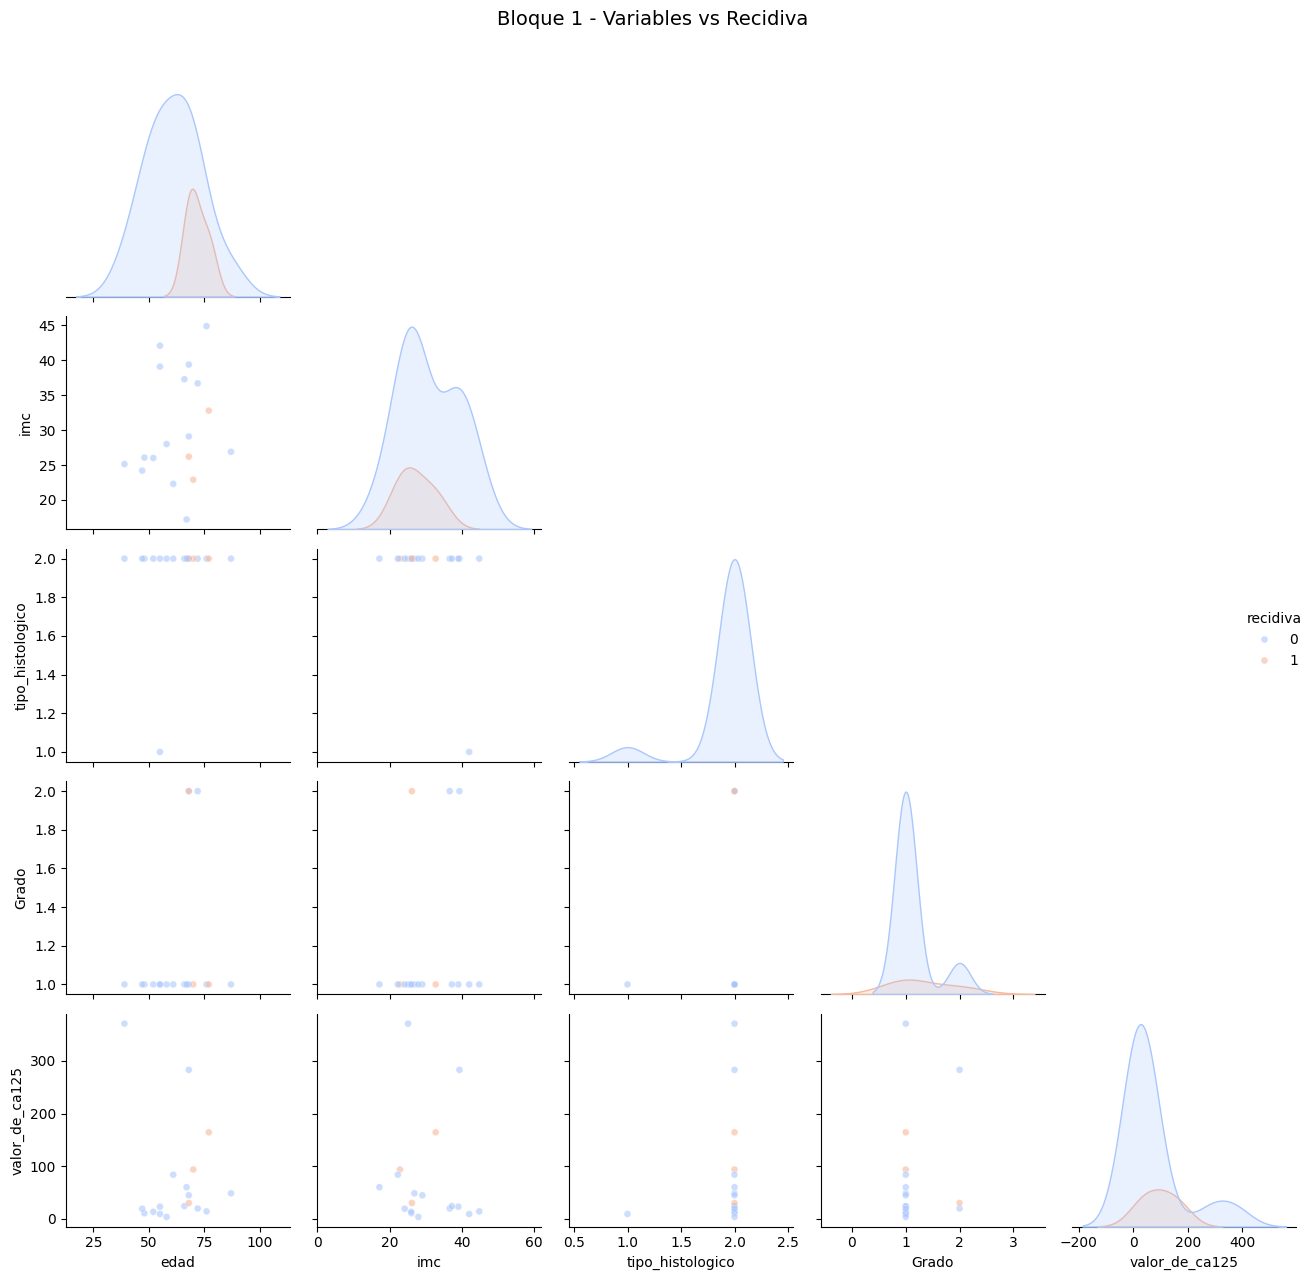


Bloque 2: ['ecotv_infiltsub', 'ecotv_infiltobj', 'metasta_distan', 'grupo_riesgo', 'estadiaje_pre_i']
Registros sin NA: 151


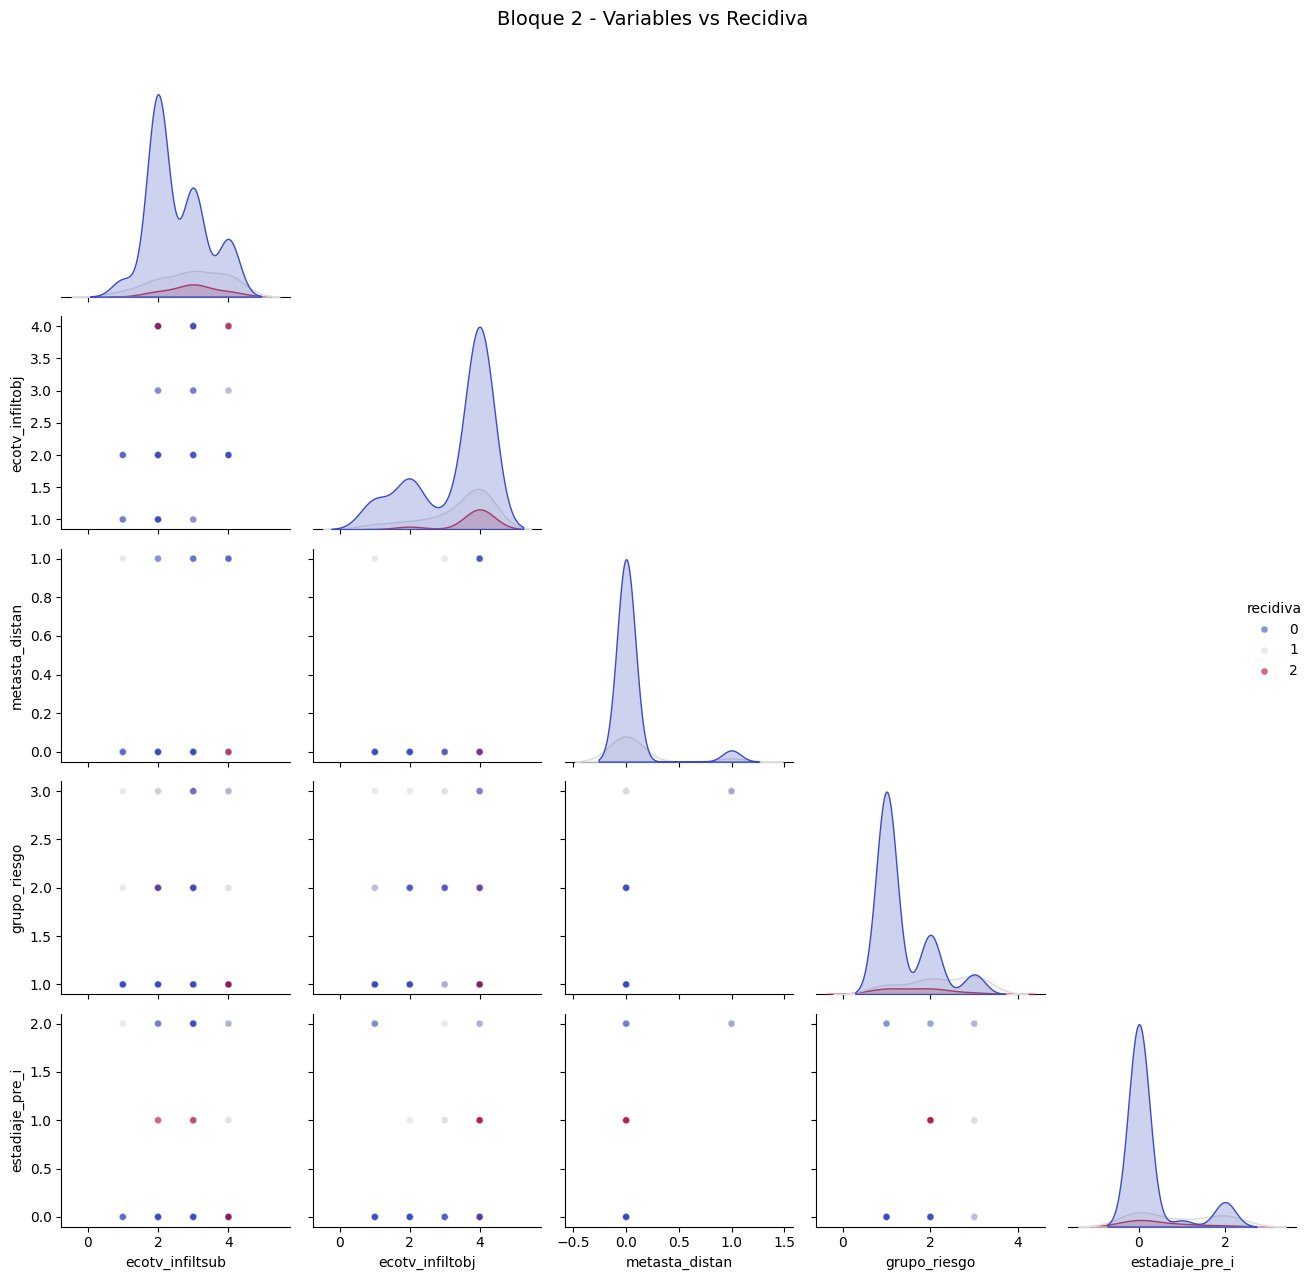


Bloque 3: ['tto_NA', 'tto_1_quirugico', 'asa', 'histo_defin', 'grado_histologi']
Registros sin NA: 131


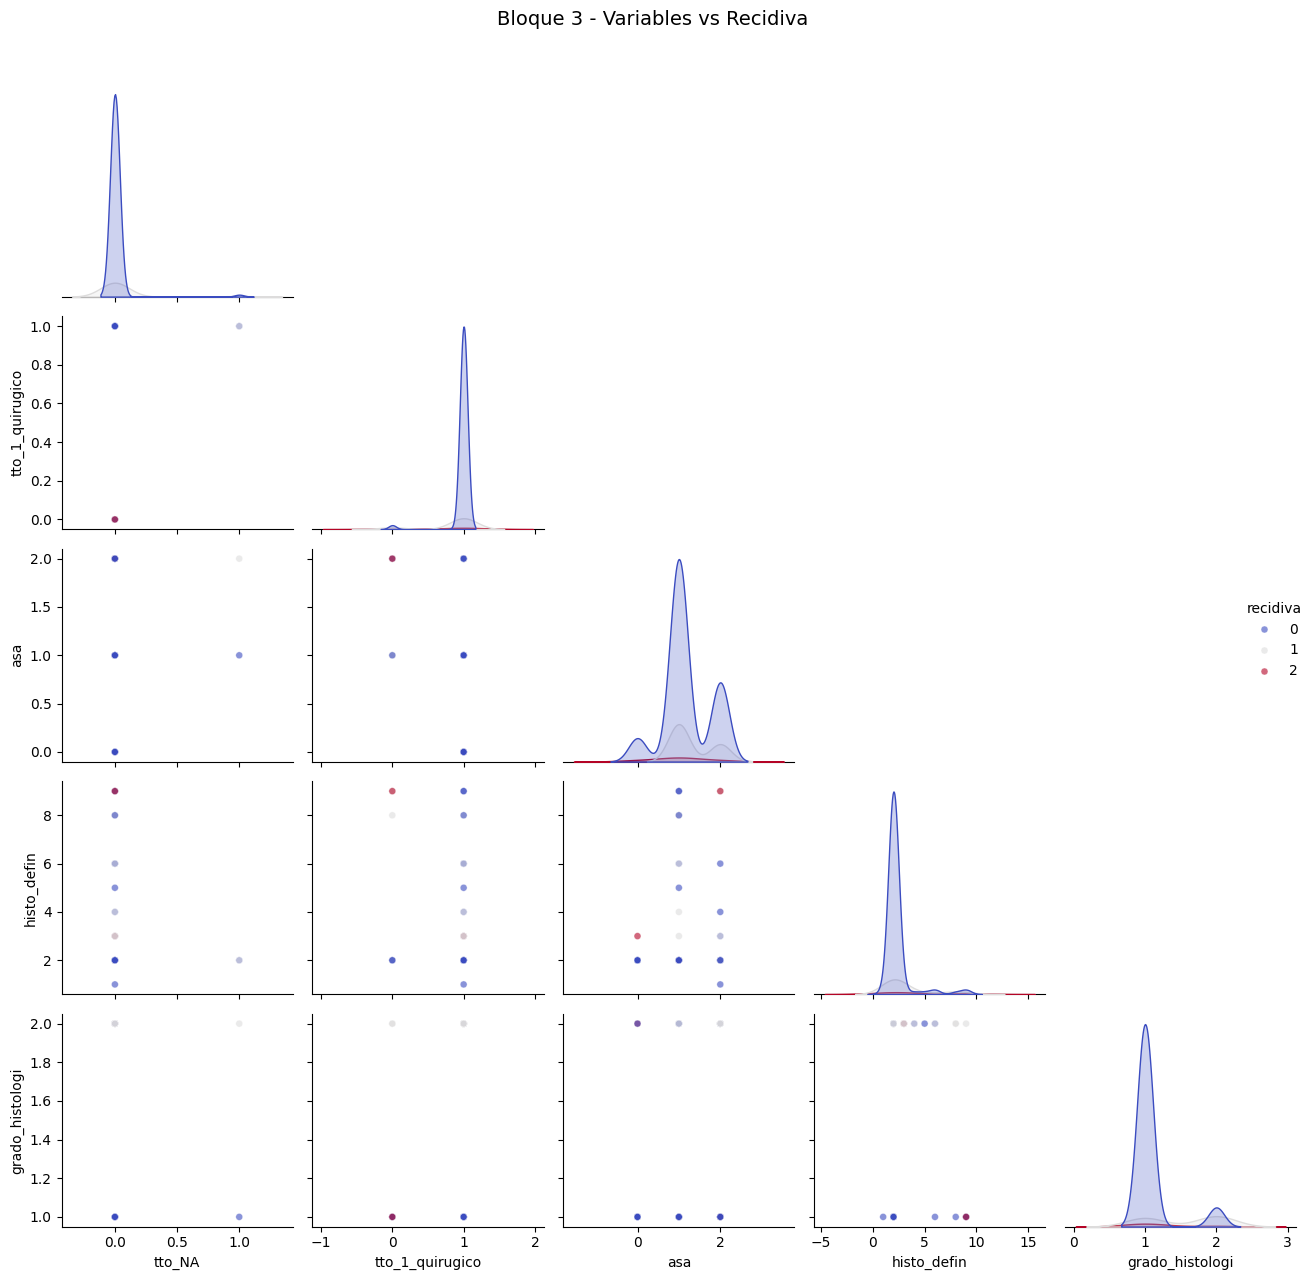


Bloque 4: ['tamano_tumoral', 'afectacion_linf', 'AP_centinela_pelvico', 'AP_ganPelv', 'AP_glanPaor']
Registros sin NA: 23


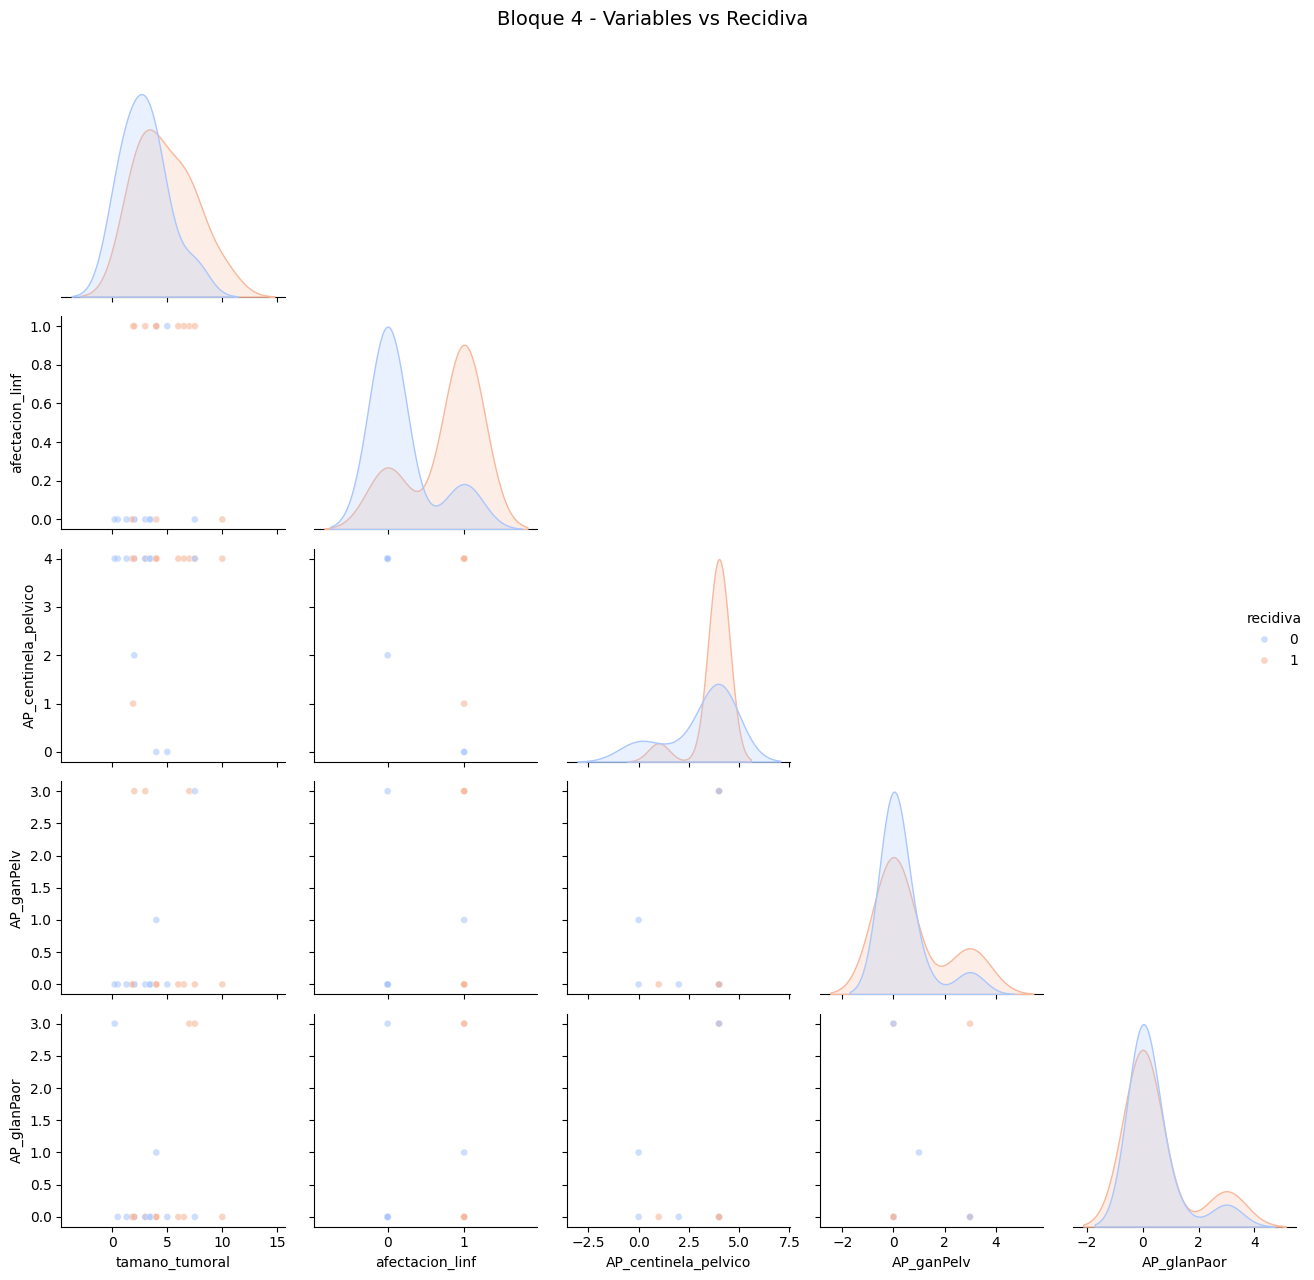


Bloque 5: ['recep_est_porcent', 'rece_de_Ppor', 'beta_cateninap', 'estudio_genetico_r01', 'estadificacion_']
Registros sin NA: 84


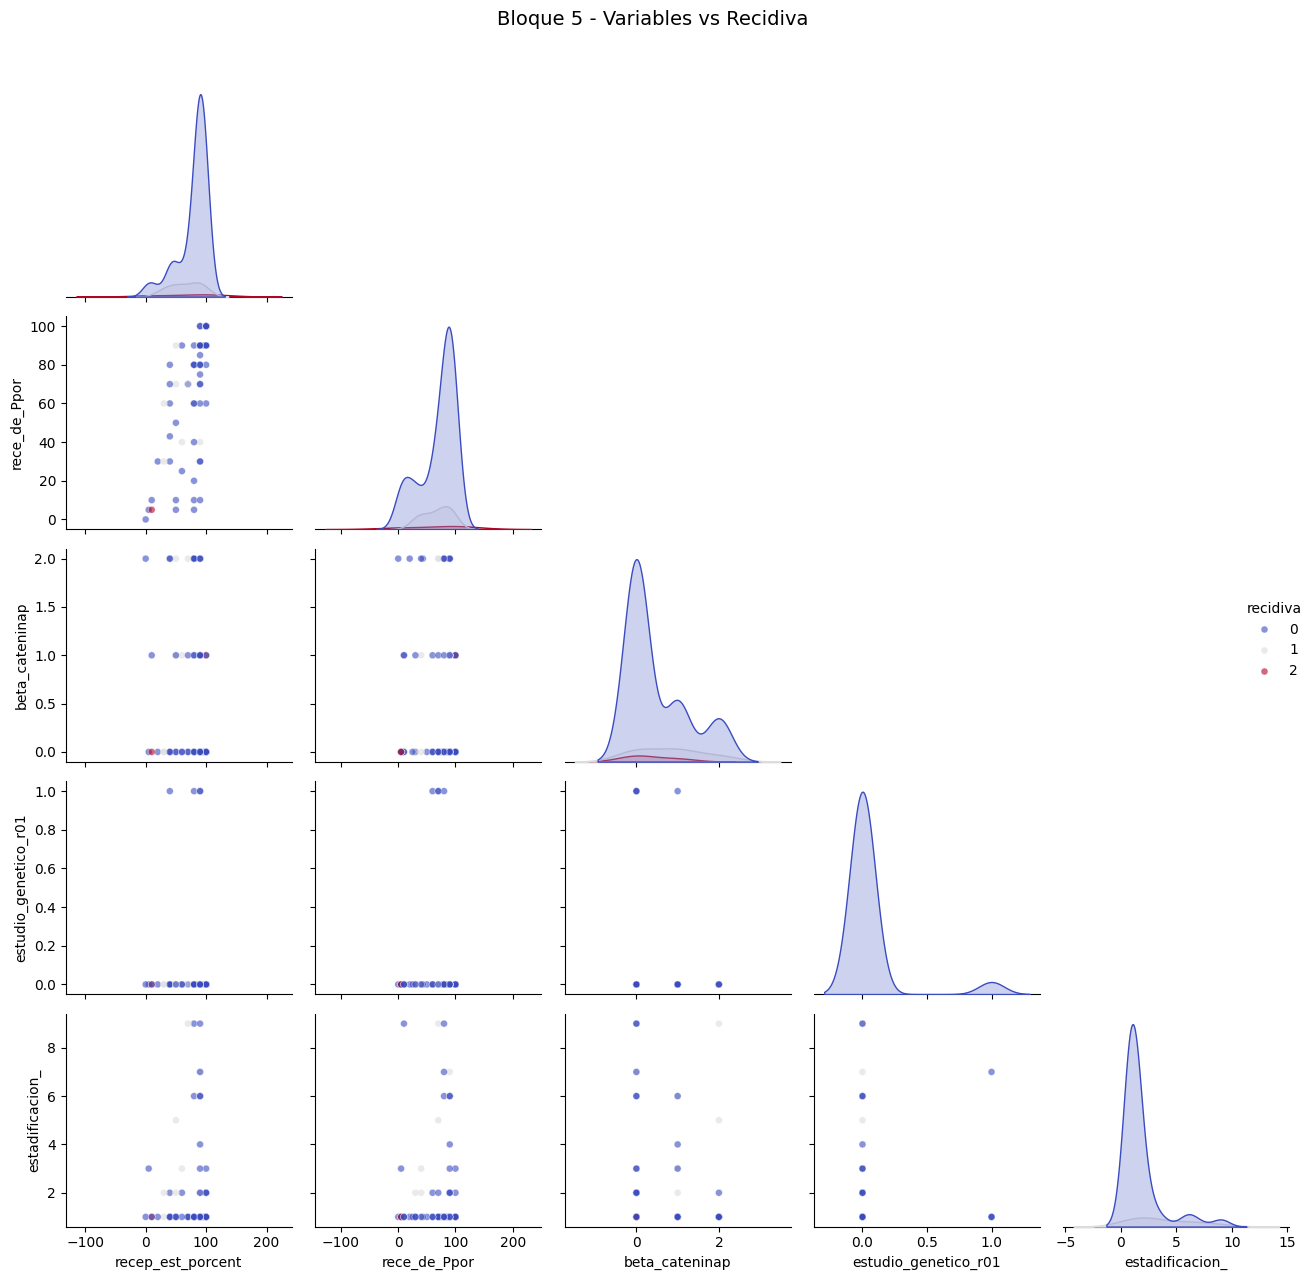


Bloque 6: ['FIGO2023', 'grupo_de_riesgo_definitivo', 'Tributaria_a_Radioterapia', 'bqt', 'qt']
Registros sin NA: 136


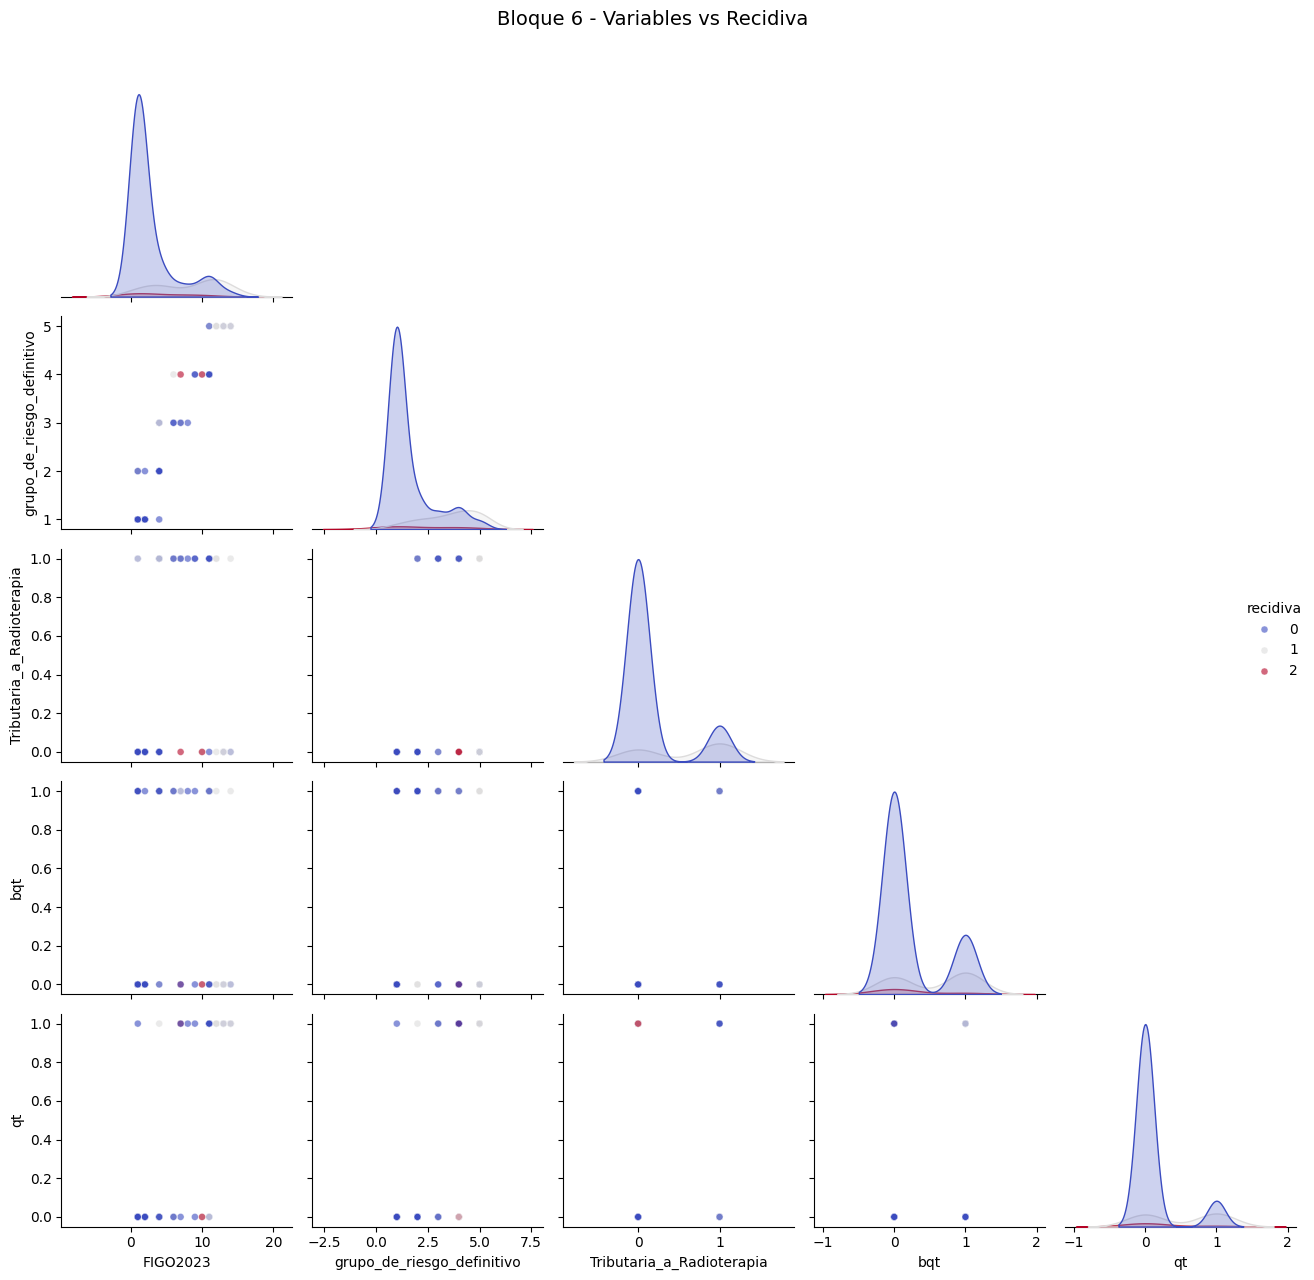


Bloque 7: ['Tratamiento_RT', 'Tratamiento_sistemico', 'est_pcte', 'causa_muerte', 'libre_enferm']
Registros sin NA: 11


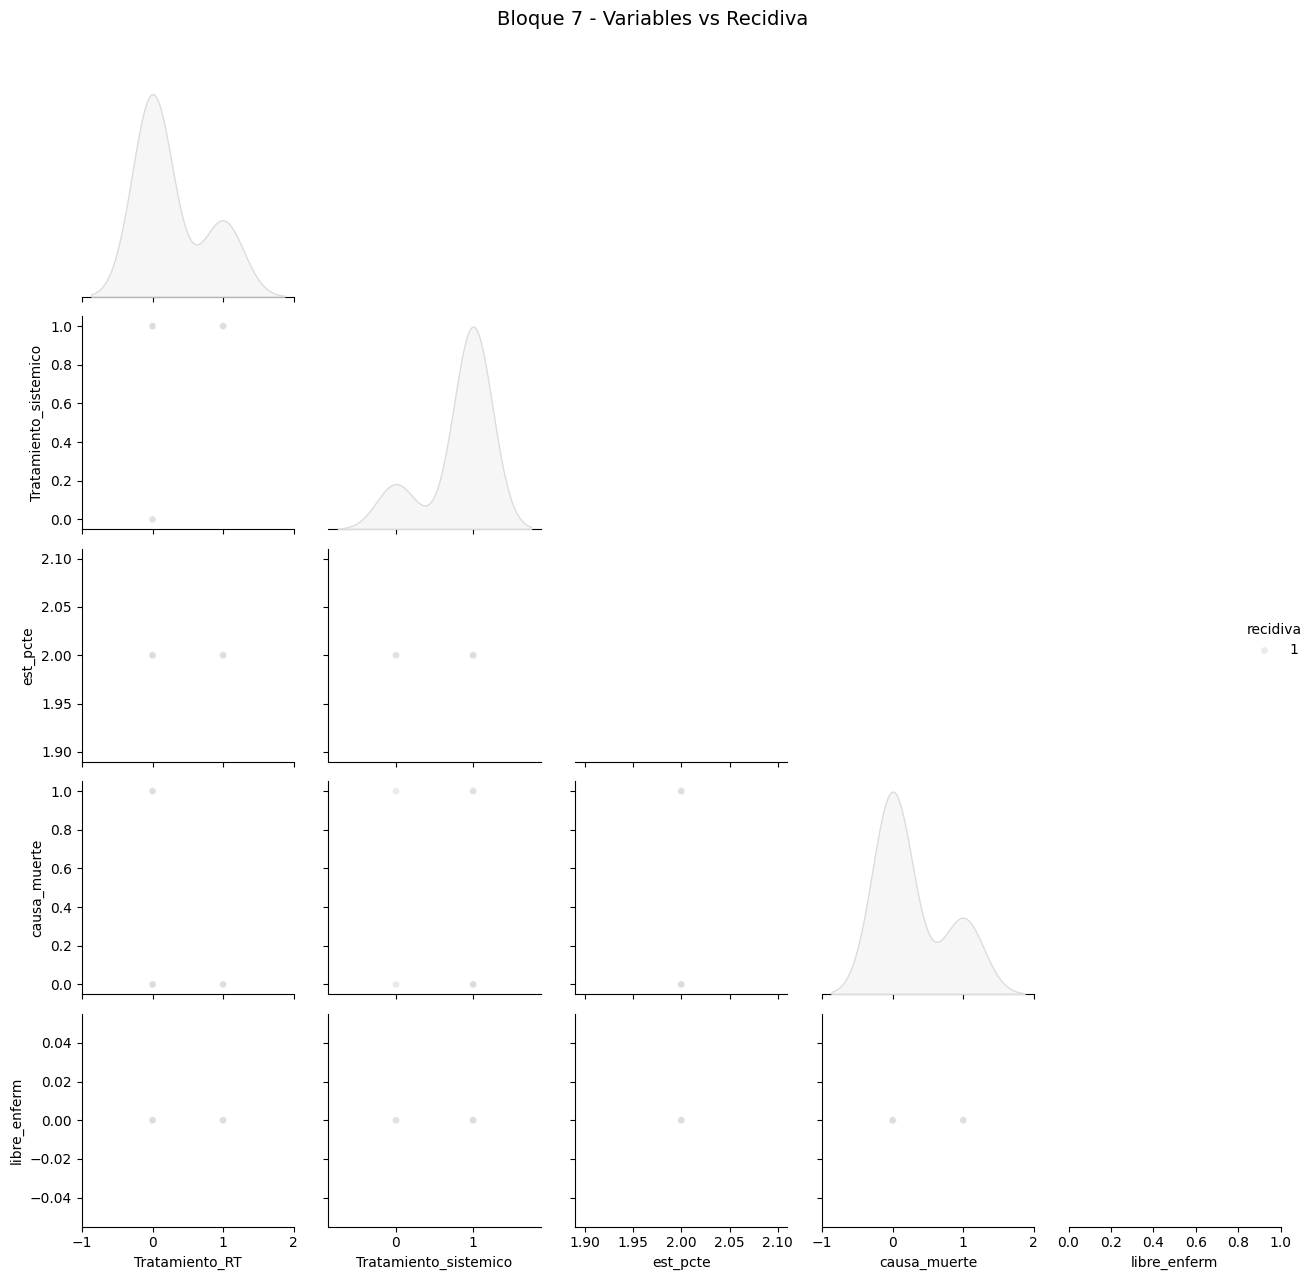


Bloque 8: ['numero_de_recid', 'dx_recidiva', 'num_recidiva', 'loc_recidiva_r01', 'tto_recidiva']
Registros sin NA: 8


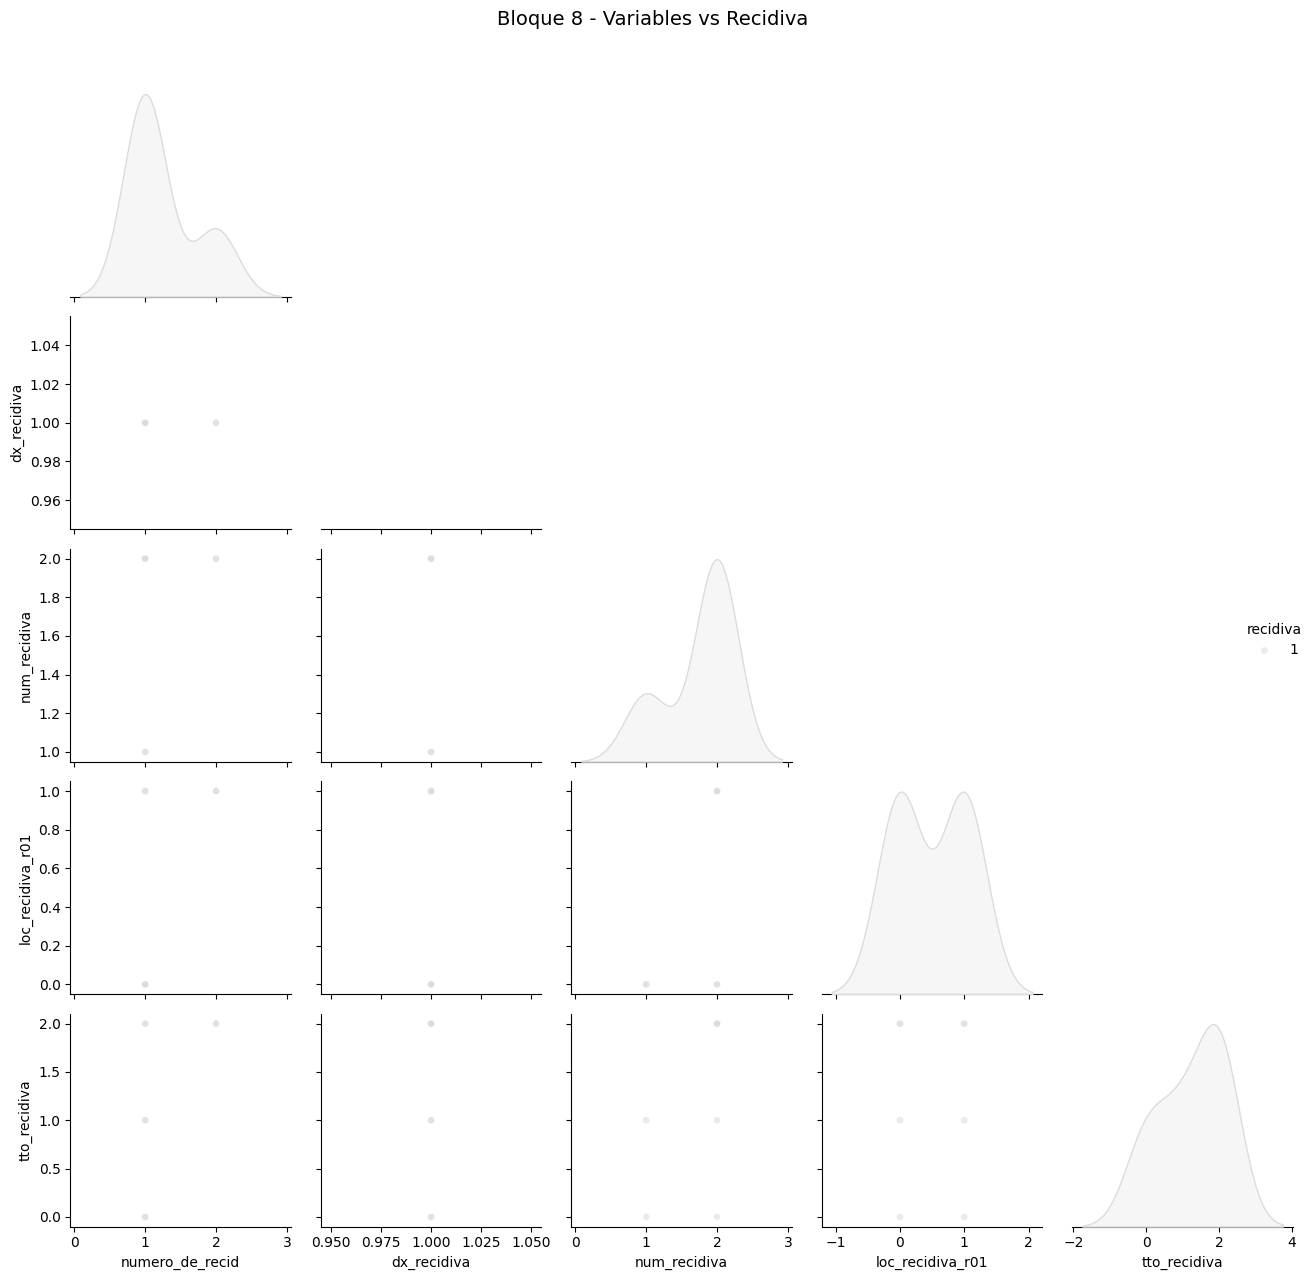


Bloque 9: ['Tt_recidiva_qx', 'Reseccion_macroscopica_complet']
Registros sin NA: 27


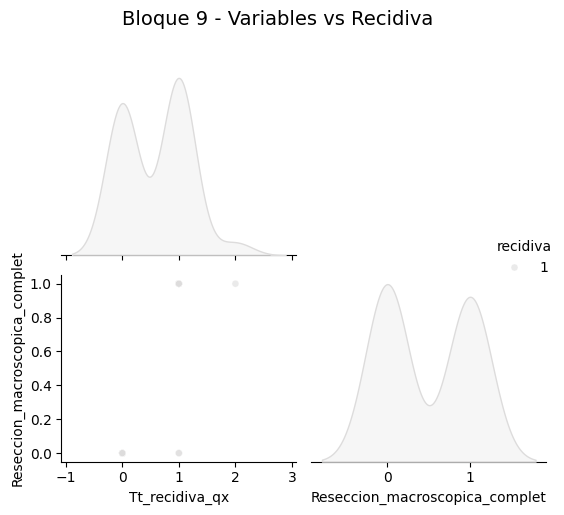

In [5]:
# Obtener columnas numéricas (excluyendo 'recidiva' que será el hue)
df_numeric = df_filtered.select_dtypes(include=[np.number])
columnas_num = [col for col in df_numeric.columns if col != 'recidiva']

print(f"Total variables numéricas: {len(columnas_num)}")

# Dividir en bloques de 5
bloque_size = 5
bloques = [columnas_num[i:i+bloque_size] for i in range(0, len(columnas_num), bloque_size)]

print(f"Se generarán {len(bloques)} gráficos")

# Crear un pairplot por cada bloque
for i, bloque in enumerate(bloques):
    print(f"\n{'='*50}")
    print(f"Bloque {i+1}: {bloque}")
    print(f"{'='*50}")
    
    # Añadir 'recidiva' al bloque para usarlo como hue
    cols_plot = bloque + ['recidiva']
    df_plot = df_filtered[cols_plot].dropna()
    
    print(f"Registros sin NA: {len(df_plot)}")
    
    if len(df_plot) > 0:
        g = sns.pairplot(df_plot, hue='recidiva', 
                        corner=True, 
                        diag_kind='kde',
                        palette='coolwarm',
                        plot_kws={'alpha': 0.6, 's': 25})
        g.fig.suptitle(f'Bloque {i+1} - Variables vs Recidiva', y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No hay datos suficientes después de eliminar NA")

In [6]:
# Contar recidiva = 2
count_recidiva_2 = (df_filtered['recidiva'] == 2).sum()
print(f"Registros con recidiva = 2: {count_recidiva_2}")

# Ver distribución completa de recidiva
print("\nDistribución completa:")
print(df_filtered['recidiva'].value_counts())

Registros con recidiva = 2: 9

Distribución completa:
recidiva
0    125
1     29
2      9
Name: count, dtype: int64


In [7]:
# Filtrar: quitar recidiva = 2
df_filtered = df_filtered[df_filtered['recidiva'] != 2]

print(f"Registros restantes: {len(df_filtered)}")
print(f"\nDistribución de recidiva ahora:")
print(df_filtered['recidiva'].value_counts())

Registros restantes: 154

Distribución de recidiva ahora:
recidiva
0    125
1     29
Name: count, dtype: int64


## Next Step
→ Go to `02_data_preprocessing.ipynb`